In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/annotations/labelTxt/P2387.txt
/kaggle/input/annotations/labelTxt/P2494.txt
/kaggle/input/annotations/labelTxt/P0358.txt
/kaggle/input/annotations/labelTxt/P2067.txt
/kaggle/input/annotations/labelTxt/P1164.txt
/kaggle/input/annotations/labelTxt/P0572.txt
/kaggle/input/annotations/labelTxt/P1142.txt
/kaggle/input/annotations/labelTxt/P1551.txt
/kaggle/input/annotations/labelTxt/P2257.txt
/kaggle/input/annotations/labelTxt/P0966.txt
/kaggle/input/annotations/labelTxt/P2503.txt
/kaggle/input/annotations/labelTxt/P0884.txt
/kaggle/input/annotations/labelTxt/P2729.txt
/kaggle/input/annotations/labelTxt/P1773.txt
/kaggle/input/annotations/labelTxt/P1344.txt
/kaggle/input/annotations/labelTxt/P1353.txt
/kaggle/input/annotations/labelTxt/P1955.txt
/kaggle/input/annotations/labelTxt/P0479.txt
/kaggle/input/annotations/labelTxt/P2321.txt
/kaggle/input/annotations/labelTxt/P1726.txt
/kaggle/input/annotations/labelTxt/P1306.txt
/kaggle/input/annotations/labelTxt/P1926.txt
/kaggle/in

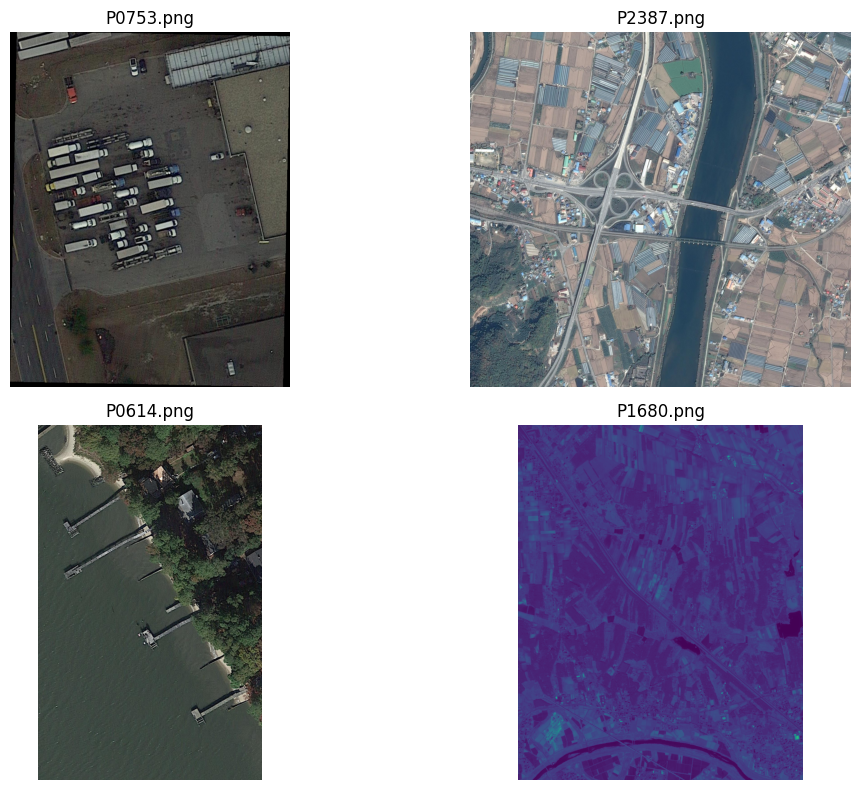

In [2]:
import matplotlib.pyplot as plt
from PIL import Image

# Sample image paths
image_paths = [
    "/kaggle/input/dota-data/DOTA/train/images/P0753.png",
    "/kaggle/input/dota-data/DOTA/train/images/P2387.png",
    "/kaggle/input/dota-data/DOTA/train/images/P0614.png",
    "/kaggle/input/dota-data/DOTA/train/images/P1680.png"
]

# Plot them
plt.figure(figsize=(12, 8))
for i, img_path in enumerate(image_paths):
    img = Image.open(img_path)
    plt.subplot(2, 2, i+1)
    plt.imshow(img)
    plt.title(img_path.split("/")[-1])
    plt.axis("off")
plt.tight_layout()
plt.show()

In [3]:
import torch
torch.cuda.is_available()

True

In [4]:
!nvidia-smi

Mon Jul 14 12:34:35 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   46C    P8             11W /   70W |       3MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [5]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import random

In [6]:
# 1. Load image paths
img_dir = '/kaggle/input/dota-data/DOTA/train/images'
img_paths = [os.path.join(img_dir, f) for f in os.listdir(img_dir) if f.endswith('.png')]

In [7]:
# 2. Analyze image sizes and resolution
sizes = []
for path in img_paths[:100]:  # Limit to 100 for speed
    with Image.open(path) as img:
        sizes.append(img.size)  # (width, height)

widths, heights = zip(*sizes)
avg_width = sum(widths) // len(widths)
avg_height = sum(heights) // len(heights)

print(f" Average Image Size: {avg_width} x {avg_height}")
print(f"Min Size: {min(widths)} x {min(heights)}, Max Size: {max(widths)} x {max(heights)}")

 Average Image Size: 2276 x 2104
Min Size: 410 x 533, Max Size: 7530 x 7525


In [8]:
# 3. Check RGB vs Grayscale
sample_img = Image.open(img_paths[8])
print(f"Sample image mode: {sample_img.mode}")

Sample image mode: RGB


In [9]:
sample_img = Image.open(img_paths[0])
print(f"Sample image mode: {sample_img.mode}")

Sample image mode: L


In [10]:
sample_img = Image.open(img_paths[87])
print(f"Sample image mode: {sample_img.mode}")

Sample image mode: RGB


In [11]:
sample_img = Image.open(img_paths[1])
print(f"Sample image mode: {sample_img.mode}")

Sample image mode: L


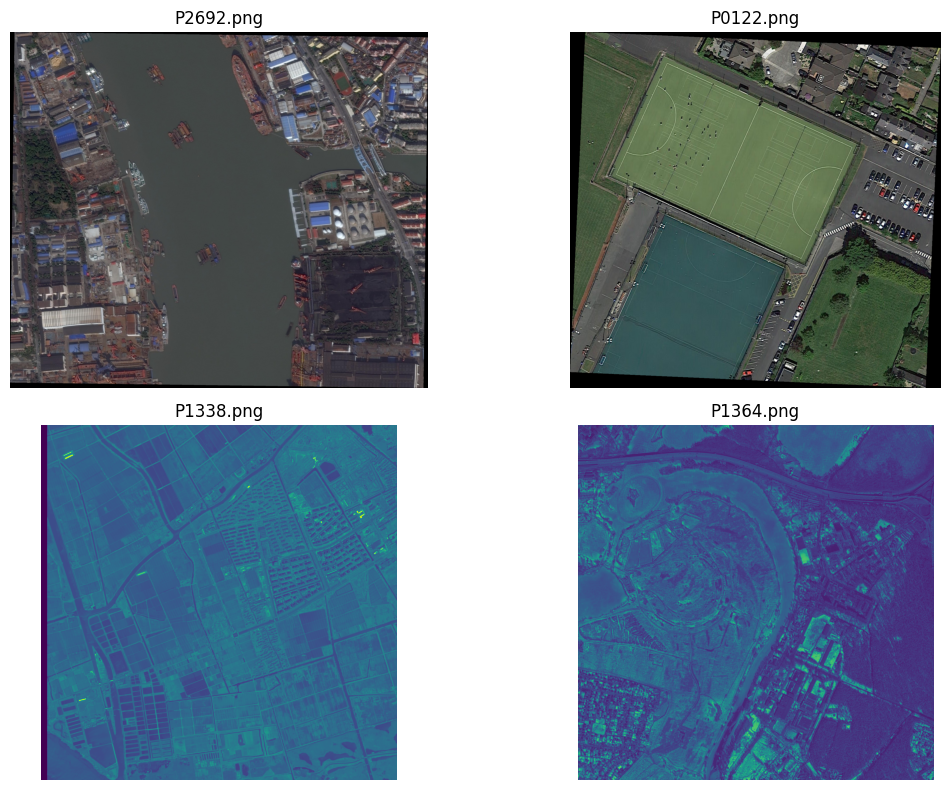

In [12]:
# 4. Display a few random images
plt.figure(figsize=(12, 8))
sample_paths = random.sample(img_paths, 4)

for i, path in enumerate(sample_paths):
    img = Image.open(path)
    plt.subplot(2, 2, i+1)
    plt.imshow(img)
    plt.title(os.path.basename(path))
    plt.axis('off')

plt.tight_layout()
plt.show()

In [13]:
import os
print(os.listdir('/kaggle/input'))

['annotations', 'dota-data']


In [14]:
#dataset is uploaded as "annotations"
label_dir = '/kaggle/input/annotations/labelTxt'

In [15]:
import os
from glob import glob
from PIL import Image

In [16]:
# Define paths
labeltxt_dir = '//kaggle/input/annotations/labelTxt'
image_dir = '/kaggle/input/dota-data/DOTA/train/images'
yolo_out_dir = '/kaggle/working/yolo_labels'

os.makedirs(yolo_out_dir, exist_ok=True)

In [17]:
# Map DOTA classes to numeric IDs
dota_classes = [
    'plane', 'baseball-diamond', 'bridge', 'ground-track-field',
    'small-vehicle', 'large-vehicle', 'ship', 'tennis-court',
    'basketball-court', 'storage-tank', 'soccer-ball-field',
    'roundabout', 'harbor', 'swimming-pool', 'helicopter'
]
class_to_id = {cls: idx for idx, cls in enumerate(dota_classes)}

In [18]:
def polygon_to_yolo(poly_pts, img_w, img_h):
    xs = poly_pts[::2]
    ys = poly_pts[1::2]
    x_min, x_max = min(xs), max(xs)
    y_min, y_max = min(ys), max(ys)
    x_center = (x_min + x_max) / 2.0 / img_w
    y_center = (y_min + y_max) / 2.0 / img_h
    w = (x_max - x_min) / img_w
    h = (y_max - y_min) / img_h
    return x_center, y_center, w, h

In [19]:
# Convert each label file
converted = 0
for txt_file in sorted(glob(f"{labeltxt_dir}/*.txt")):
    basename = os.path.splitext(os.path.basename(txt_file))[0]
    img_path = os.path.join(image_dir, f"{basename}.png")
    if not os.path.exists(img_path):
        continue

    with Image.open(img_path) as img:
        img_w, img_h = img.size

    with open(txt_file, 'r') as f:
        lines = f.readlines()

    yolo_labels = []
    for line in lines:
        parts = line.strip().split()
        if len(parts) < 9:
            continue
        cls, coords = parts[8], list(map(float, parts[:8]))
        if cls not in class_to_id:
            continue
        x_center, y_center, w, h = polygon_to_yolo(coords, img_w, img_h)
        yolo_line = f"{class_to_id[cls]} {x_center:.6f} {y_center:.6f} {w:.6f} {h:.6f}"
        yolo_labels.append(yolo_line)

    with open(os.path.join(yolo_out_dir, f"{basename}.txt"), "w") as out_f:
        out_f.write("\n".join(yolo_labels) + "\n")
    converted += 1

print(f"Converted {converted} annotation files to YOLO format.")
print(f"Labels saved in: {yolo_out_dir}")

Converted 1411 annotation files to YOLO format.
Labels saved in: /kaggle/working/yolo_labels


In [21]:
import os

label_dir = '/kaggle/input/annotations/labelTxt'

# Get list of annotation files
label_files = [f for f in os.listdir(label_dir) if f.endswith('.txt')]

# Count annotations per file
annotation_counts = {}
for file in label_files:
    path = os.path.join(label_dir, file)
    with open(path, 'r') as f:
        lines = f.readlines()
        annotation_counts[file] = len(lines)

total_images = len(annotation_counts)
total_annotations = sum(annotation_counts.values())
average_ann = total_annotations / total_images if total_images > 0 else 0

print(f"\nTotal images with labels: {total_images}")
print(f"Total annotations: {total_annotations}")
print(f"Average annotations per image: {average_ann:.2f}")


Total images with labels: 1411
Total annotations: 101812
Average annotations per image: 72.16


In [22]:
# class distribution
from collections import Counter
import os

# Path to YOLO label files
label_dir = '/kaggle/working/yolo_labels'
label_files = [f for f in os.listdir(label_dir) if f.endswith('.txt')]

# Count class frequencies
class_counts = Counter()

for file in label_files:
    with open(os.path.join(label_dir, file), 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) == 5:
                class_id = int(parts[0])
                class_counts[class_id] += 1

# Print class distribution
print("Class Distribution:")
for cls_id, count in sorted(class_counts.items()):
    print(f"Class {cls_id}: {count} annotations")

Class Distribution:
Class 0: 8055 annotations
Class 1: 415 annotations
Class 2: 2047 annotations
Class 3: 325 annotations
Class 4: 26126 annotations
Class 5: 16969 annotations
Class 6: 28068 annotations
Class 7: 2367 annotations
Class 8: 515 annotations
Class 9: 5029 annotations
Class 10: 326 annotations
Class 11: 399 annotations
Class 12: 5983 annotations
Class 13: 1736 annotations
Class 14: 630 annotations


In [23]:
#Check for missing/malformed labels
malformed_files = []
malformed_lines = {}

for file in label_files:
    path = os.path.join(label_dir, file)
    with open(path, 'r') as f:
        lines = f.readlines()

    for i, line in enumerate(lines):
        parts = line.strip().split()
        if len(parts) != 5:
            malformed_files.append(file)
            malformed_lines.setdefault(file, []).append((i + 1, line.strip()))

unique_malformed_files = sorted(set(malformed_files))
print(f"Total files with malformed lines: {len(unique_malformed_files)}\n")

# Print all malformed file names
print(" Malformed files:")
for fname in unique_malformed_files:
    print(f" {fname}")

Total files with malformed lines: 2

 Malformed files:
 P1531.txt
 P2123.txt


In [24]:
#Map Class IDs to DOTA Class Names
dota_classes = [
    'plane', 'baseball-diamond', 'bridge', 'ground-track-field',
    'small-vehicle', 'large-vehicle', 'ship', 'tennis-court',
    'basketball-court', 'storage-tank', 'soccer-ball-field',
    'roundabout', 'harbor', 'swimming-pool', 'helicopter'
]

for class_id, count in class_counts.items():
    print(f"{class_id:2} ({dota_classes[class_id]:20}): {count} annotations")

 9 (storage-tank        ): 5029 annotations
 0 (plane               ): 8055 annotations
 6 (ship                ): 28068 annotations
 4 (small-vehicle       ): 26126 annotations
 5 (large-vehicle       ): 16969 annotations
12 (harbor              ): 5983 annotations
11 (roundabout          ): 399 annotations
 2 (bridge              ): 2047 annotations
 3 (ground-track-field  ): 325 annotations
10 (soccer-ball-field   ): 326 annotations
 7 (tennis-court        ): 2367 annotations
 1 (baseball-diamond    ): 415 annotations
13 (swimming-pool       ): 1736 annotations
 8 (basketball-court    ): 515 annotations
14 (helicopter          ): 630 annotations
